In [19]:
%matplotlib inline
import matplotlib.animation as ani
import matplotlib.collections as mc
import matplotlib.pyplot as plt
import numpy as np
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
Writer = ani.writers['ffmpeg']
writer = Writer(fps=100, metadata=dict(artist='Laurent Garcin'), bitrate=18000)

In [8]:
def get_lines(t, r):
    x1 = np.cos(t)
    y1 = np.sin(t)
    x2 = np.cos(r * t)
    y2 = np.sin(r * t)
    lines = [[(x1, y1), (x2, y2)] for x1, y1, x2, y2 in zip(x1, y1, x2, y2)]
    return lines

def get_env(t, r):
    x=(r*np.cos(t)+np.cos(r*t))/(r+1)
    y=(r*np.sin(t)+np.sin(r*t))/(r+1)
    return x,y

In [9]:
%%capture
fig=plt.figure(figsize=(6, 6))
t = np.linspace(0, 2 * np.pi, 300)
plt.axis('equal')
plt.axis('off')
lc = mc.LineCollection([])
ax=plt.gca()
ax.add_collection(lc)
ax.autoscale()


def animate(frame):
    lc.set_paths(get_lines(t, frame))
    lc.set_linewidth(.2)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    return lc,


anim = ani.FuncAnimation(fig, animate, frames=np.linspace(
    0, 10, 1000), interval=10, blit=True)

In [10]:
anim.save("../images/2018/11/droites.webm",writer=writer)

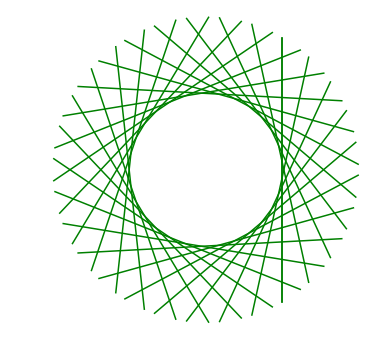

In [17]:
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.axis('off')
ang=2*np.pi/3
t=np.linspace(0,2*np.pi,30)
u=np.linspace(-ang,ang,2)
for z in t:
    r=1/np.cos(u)
    plt.plot(r*np.cos(u-z),r*np.sin(u-z),color="green")
plt.savefig("../images/2018/11/cercle.png")

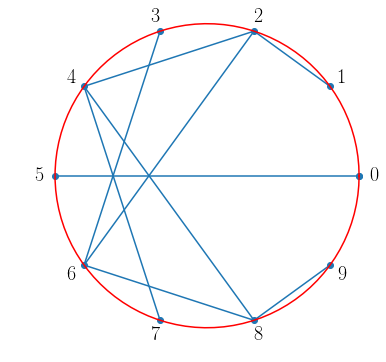

In [105]:
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.axis('off')
n=10
r=2
t=np.linspace(0,2*np.pi,n+1)
plt.scatter(np.cos(t),np.sin(t))
lines=get_lines(t,r)
plt.gca().add_collection(mc.LineCollection(lines))
for i in range(n):
    plt.annotate("$"+str(i)+"$",xy=(1.1*np.cos(t[i]),1.1*np.sin(t[i])),va="center",ha="center",fontsize=20)
t=np.linspace(0,2*np.pi,100)
plt.plot(np.cos(t),np.sin(t),color="red")
plt.savefig("../images/2018/11/baba.png")

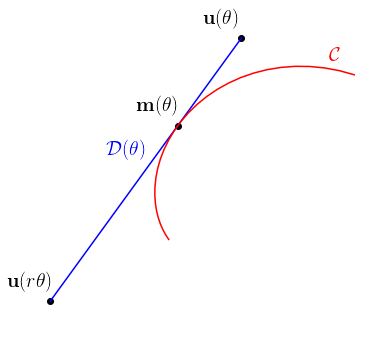

In [114]:
plt.figure(figsize=(6,6))
plt.axis('off')
plt.axis('equal')
r=2
ang=8*np.pi/15

x1,y1=np.cos(ang),np.sin(ang)
x2,y2=np.cos(r*ang),np.sin(r*ang)
x3,y3=(r*x1+x2)/(r+1),(r*y1+y2)/(r+1)
plt.scatter([x1,x2,x3],[y1,y2,y3],color="black")
plt.annotate(r'$\mathbf{u}(\theta)$',xy=(x1,y1),fontsize=20,va='center',ha='center',textcoords='offset pixels',xytext=(-20,20))
plt.annotate(r'$\mathbf{u}(r\theta)$',xy=(x2,y2),fontsize=20,va='center',ha='center',textcoords='offset pixels',xytext=(-20,20))
plt.annotate(r'$\mathbf{m}(\theta)$',xy=(x3,y3),fontsize=20,va='center',ha='center',textcoords='offset pixels',xytext=(-20,20))

plt.plot([x1,x2],[y1,y2],color="blue")
plt.annotate(r'$\mathcal{D}(\theta)$',xy=((x1+x2)/2,(y1+y2)/2),fontsize=20,va='center',ha='center',textcoords='offset pixels',xytext=(-20,20),color='blue')


x,y=get_env(np.linspace(.5*ang,1.5*ang,30),r)
plt.plot(x,y,color="red")
plt.annotate(r'$\mathcal{C}$',xy=(x[0],y[0]),fontsize=20,va='center',ha='center',textcoords='offset pixels',xytext=(-20,20),color='red')
plt.savefig("../images/2018/11/tangence.png")

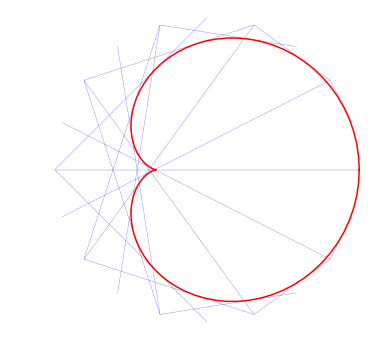

In [122]:
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.axis('off')
n=20
r=2
t=np.linspace(0,2*np.pi,n+1)
lines=get_lines(t,r)
plt.gca().add_collection(mc.LineCollection(lines,color="blue",linewidth=.2))
t=np.linspace(0,2*np.pi,100)
x,y=get_env(t,r)
plt.plot(x,y,color="red")
plt.savefig("../images/2018/11/tangence_evidence.png")

In [20]:
%%capture
fig=plt.figure(figsize=(6, 6))
t = np.linspace(0, 2 * np.pi, 300)
plt.axis('equal')
plt.axis('off')
lc = mc.LineCollection([],color="blue")
ax=plt.gca()
ax.add_collection(lc)
ax.autoscale()
p,=plt.plot([],[],color="red")


def animate(frame):
    lc.set_paths(get_lines(t, frame))
    lc.set_linewidth(.2)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    x,y=get_env(t,frame)
    p.set_data(x,y)
    return lc,p,

anim = ani.FuncAnimation(fig, animate, frames=np.linspace(
    0, 10, 1000), interval=10, blit=True)

In [21]:
anim.save("../images/2018/11/droites_enveloppe.mp4",writer=writer)